In [61]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from matplotlib import rcParams,font_manager

In [23]:
rcParams['figure.figsize'] = (6,6) #figure size in inches
rcParams['font.family'] = "sans-serif" 
rcParams['font.weight'] = "roman" 
rcParams['font.style'] = "normal" # not 100% sure what this does but it was recommended
rcParams['font.size'] = 32 # not 100% sure what this does but it was recommended
rcParams['pdf.fonttype'] = 42
rcParams['axes.linewidth'] = 2 #thickness of the border
rcParams['xtick.major.width'] = rcParams['axes.linewidth'] # make sure line widths are consistent
rcParams['ytick.major.width'] = rcParams['axes.linewidth']
rcParams['axes.spines.right'] = False #hides right border
rcParams['axes.spines.top'] = False #hides top
rcParams['legend.frameon'] = False #hides box around the legend
rcParams['legend.fontsize'] = 18 #font size in pt
rcParams['axes.labelsize'] = 32 
rcParams['xtick.labelsize'] = 24
rcParams['ytick.labelsize'] = rcParams['xtick.labelsize']
rcParams['lines.linewidth'] = 3
rcParams['xtick.major.size'] = 5
rcParams['lines.markersize'] = 16
rcParams['ytick.major.size'] = rcParams['xtick.major.size'] 

In [24]:
direc = 'C:/Users/svo/Google Drive/Bas Games/Analysis/'
fig_direc = 'C:/Users/svo/Google Drive/Bas Games/Figures/'

In [100]:
model_moves = np.loadtxt(direc + 'Model prediction/prediction_hvh.txt',dtype=int)
move_stats_hvh = np.loadtxt(direc + 'Move statistics/move_stats_hvh.txt',dtype=int)
num_pieces_hvh = move_stats_hvh[:,3]
human_move = move_stats_hvh[:,4]
player = move_stats_hvh[:,0]

In [101]:
model_accuracy = np.mean(model_moves==human_move[:,None],axis=1)

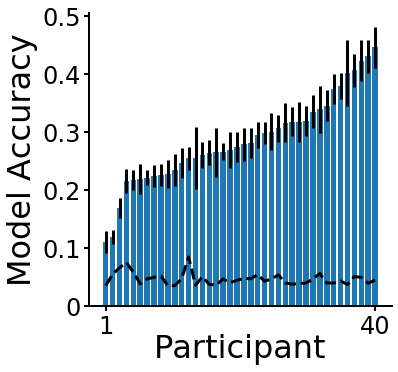

In [153]:
fig,ax=plt.subplots(figsize=(6,6))
ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))

m = [np.mean(model_accuracy[player==i]) for i in range(40)]
s = np.array([np.std(model_accuracy[player==i])/np.sqrt(np.sum(player==i)) for i in range(40)])
#ax.axhline(np.mean(m),color='C0')
ax.bar(x=range(1,41),height=np.sort(m),yerr=s[np.argsort(m)],width=0.8)
ax.plot(range(1,41),[np.mean(1/(36-num_pieces_hvh[player==i])) for i in np.argsort(m)],color='black',linestyle='dashed')
ax.set_xlabel('Participant',labelpad=-5)
ax.set_ylabel('Model Accuracy')
ax.set_xticks([1,40])
fig.subplots_adjust(bottom=0.2,right=0.95,left=0.25)
fig.savefig(fig_direc + 'figure_2a.pdf')
plt.show()

In [155]:
np.std(m)/np.sqrt(40)

0.012074555937995625

In [170]:
P = np.loadtxt(direc + 'Generalization/prediction_2afc_final.txt')
accuracy_2afc_model = [np.mean(P[P[:,0]==i,1:],axis=1)>0.5 for i in range(40)]

P = np.loadtxt(direc + 'Generalization/prediction_eval_final.txt')
accuracy_eval_model = [np.corrcoef(np.mean(P[P[:,0]==i,2:],axis=1),P[P[:,0]==i,1])[0,1] \
                      for i in range(40)]
prediction_eval_model = [np.mean(P[P[:,0]==i,2:],axis=1) for i in range(40)]
eval_moves = [P[P[:,0]==i,1] for i in range(40)]

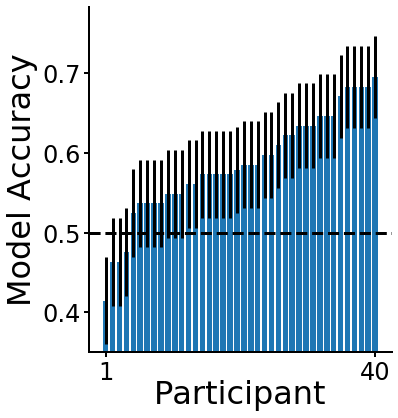

0.5861041727887158


In [169]:
m = np.array([np.mean(p) for p in accuracy_2afc_model])
s = np.array([np.std(p)/np.sqrt(len(p)) for p in accuracy_2afc_model])

fig,ax=plt.subplots(figsize=(6,6))
ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))

ax.axhline(0.5,linestyle='dashed',color='black')
#ax.axhline(np.mean(m),linestyle='dashed',color='C1')
ax.bar(x=range(1,41),bottom=0,height=np.sort(m),yerr=np.array(s)[np.argsort(m)])
ax.set_ylabel('Model Accuracy')
ax.set_xlabel('Participant',labelpad=-5)
ax.set_xticks([1,40])
ax.set_ylim([0.35,None])
fig.subplots_adjust(bottom=0.15,right=0.95,left=0.25,top=0.95)
fig.savefig(fig_direc+'2afc.pdf')
plt.show()
print(np.mean(m))

In [167]:
accuracy_2afc_model

[58.536585365853654,
 63.41463414634146,
 41.46341463414634,
 57.831325301204814,
 57.3170731707317,
 59.756097560975604,
 62.19512195121951,
 68.29268292682927,
 53.65853658536586,
 59.756097560975604,
 47.5609756097561,
 57.3170731707317,
 52.4390243902439,
 56.09756097560976,
 57.3170731707317,
 58.536585365853654,
 64.63414634146342,
 54.87804878048781,
 57.3170731707317,
 58.536585365853654,
 68.29268292682927,
 54.87804878048781,
 67.07317073170732,
 56.09756097560976,
 53.65853658536586,
 62.19512195121951,
 46.34146341463415,
 63.41463414634146,
 63.41463414634146,
 69.51219512195121,
 64.63414634146342,
 68.29268292682927,
 53.65853658536586,
 57.3170731707317,
 46.34146341463415,
 60.97560975609756,
 68.29268292682927,
 54.87804878048781,
 53.65853658536586,
 64.63414634146342]

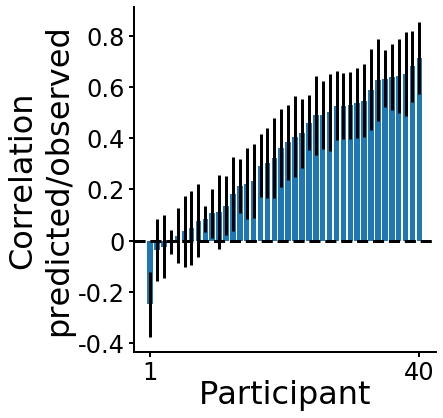

In [151]:
import scipy.stats as sts
m = np.array([sts.spearmanr(e1,e2).correlation for e1,e2 in zip(prediction_eval_model,eval_moves)])
lower = m-np.tanh(np.arctanh(m) - 1/np.sqrt(79))
upper = np.tanh(np.arctanh(m) + 1/np.sqrt(79))-m
ax.axhline(0,linestyle='dashed',color='black')
ax.errorbar(x=range(1,41),y=np.sort(m),yerr=[np.array(lower)[np.argsort(m)],np.array(upper)[np.argsort(m)]],marker='p')

fig,ax=plt.subplots(figsize=(6,6))
ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))

ax.axhline(0,linestyle='dashed',color='black')
#ax.axhline(np.mean(m),linestyle='dashed',color='C1')
ax.bar(x=range(1,41),bottom=0,height=np.sort(m),yerr=np.array(s)[np.argsort(m)])
ax.set_ylabel('Correlation\npredicted/observed')
ax.set_xlabel('Participant',labelpad=-5)
ax.set_xticks([1,40])
#ax.set_ylim([0.35,None])
fig.subplots_adjust(bottom=0.15,right=0.95,left=0.25,top=0.95)
fig.savefig(fig_direc+'2afc.pdf')
plt.show()